In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
import sklearnex
import json
import copy

In [97]:
sklearnex.patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [154]:
with open("./data/vgc2023s1/team-pokemon.json", "r") as f:
    team_pokemon = pd.DataFrame(json.load(f))

team_pokemon

,team_id,rank,species,showdown_pokedex_name,item,ability,tera_type,nature,move_1,move_2,move_3,move_4,type_1,type_2,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,284,1,Dondozo,dondozo,leftovers,unaware,dragon,jolly,wave-crash,substitute,order-up,protect,water,None,150,100,115,65,65,35
1,284,1,Tatsugiri,tatsugiri,choice-scarf,commander,water,modest,draco-meteor,muddy-water,icy-wind,sleep-talk,dragon,water,68,50,60,120,95,82
2,284,1,Gholdengo,gholdengo,choice-specs,good-as-gold,steel,modest,make-it-rain,shadow-ball,thunderbolt,power-gem,steel,ghost,87,60,95,133,91,84
3,284,1,Murkrow,murkrow,eviolite,prankster,ghost,calm,tailwind,foul-play,quash,haze,dark,flying,60,85,42,85,42,91
4,284,1,Dragonite,dragonite,assault-vest,inner-focus,flying,adamant,extreme-speed,stomping-tantrum,tera-blast,low-kick,dragon,flying,91,134,95,100,100,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,283,32,Kingambit,kingambit,assault-vest,defiant,flying,nature,kowtow-cleave,low-kick,sucker-punch,iron-head,dark,steel,100,135,120,60,85,50
380,283,32,Pelipper,pelipper,life-orb,drizzle,fairy,nature,hurricane,wide-guard,hydro-pump,tailwind,water,flying,60,50,100,95,70,65
381,283,32,Gholdengo,gholdengo,leftovers,good-as-gold,steel,nature,make-it-rain,protect,nasty-plot,shadow-ball,steel,ghost,87,60,95,133,91,84
382,283,32,Mimikyu,mimikyu,safety-goggles,disguise,fairy,nature,play-rough,curse,shadow-sneak,trick-room,ghost,fairy,55,90,80,50,105,96


In [155]:
with open("./data/vgc2023s1/teams-data.json", "r") as f:
    teams_data = pd.DataFrame(json.load(f))[["team_id", "rank"]]

teams_data

,team_id,rank
0,284,1
1,285,2
2,286,3
3,287,4
4,288,5
...,...,...
59,279,28
60,280,29
61,281,30
62,282,31


In [229]:
team_pokemon_moves_melted = team_pokemon[["team_id", "species", "move_1", "move_2", "move_3", "move_4"]].melt(id_vars=["team_id", "species"], value_vars=["move_1", "move_2", "move_3", "move_4"], var_name="move_num", value_name="move")
team_pokemon_moves_melted.drop(columns=["move_num"], inplace=True)
team_pokemon_moves_melted

,team_id,species,move
0,284,Dondozo,wave-crash
1,284,Tatsugiri,draco-meteor
2,284,Gholdengo,make-it-rain
3,284,Murkrow,tailwind
4,284,Dragonite,extreme-speed
...,...,...,...
1531,283,Kingambit,iron-head
1532,283,Pelipper,tailwind
1533,283,Gholdengo,shadow-ball
1534,283,Mimikyu,trick-room


In [234]:
team_pokemon_move_dummies = pd.get_dummies(team_pokemon_moves_melted["move"], prefix="move")
team_pokemon_move_dummies

,move_after-you,move_air-slash,move_aqua-jet,move_armor-cannon,move_aurora-veil,move_baby-doll-eyes,move_beat-up,move_blizzard,move_body-press,move_brave-bird,...,move_trick,move_trick-room,move_u-turn,move_volt-switch,move_waterfall,move_wave-crash,move_wide-guard,move_will-o-wisp,move_yawn,move_zen-headbutt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [263]:
team_pokemon_moves_onehot = pd.concat([team_pokemon_moves_melted, team_pokemon_move_dummies], axis=1).drop(columns="move").groupby(["team_id", "species"]).sum().reset_index()
team_pokemon_moves_onehot

,team_id,species,move_after-you,move_air-slash,move_aqua-jet,move_armor-cannon,move_aurora-veil,move_baby-doll-eyes,move_beat-up,move_blizzard,...,move_trick,move_trick-room,move_u-turn,move_volt-switch,move_waterfall,move_wave-crash,move_wide-guard,move_will-o-wisp,move_yawn,move_zen-headbutt
0,252,Baxcalibur,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,252,Garganacl,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,252,Gholdengo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,252,Meowscarada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,252,Mimikyu,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,315,Gholdengo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,315,Kingambit,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,315,Palafin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
382,315,Pelipper,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [262]:
team_pokemon_types_melted = team_pokemon[["team_id", "species", "type_1", "type_2"]].melt(id_vars=["team_id", "species"], value_vars=["type_1", "type_2"], var_name="type_num", value_name="type")
team_pokemon_types_melted.drop(columns=["type_num"], inplace=True)

team_pokemon_type_dummies = pd.get_dummies(team_pokemon_types_melted["type"], prefix="type")

team_pokemon_types_onehot = pd.concat([team_pokemon_types_melted, team_pokemon_type_dummies], axis=1).drop(columns="type").groupby(by=["team_id", "species"]).sum().reset_index()
team_pokemon_types_onehot

,team_id,species,type_bug,type_dark,type_dragon,type_electric,type_fairy,type_fighting,type_fire,type_flying,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,252,Baxcalibur,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,252,Garganacl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,252,Gholdengo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,252,Meowscarada,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,252,Mimikyu,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,315,Gholdengo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
380,315,Kingambit,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
381,315,Palafin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
382,315,Pelipper,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [271]:
cat_cols = ["ability", "tera_type", "item"]

In [272]:
team_pokemon_cat = pd.get_dummies(team_pokemon[cat_cols])
team_pokemon_cat

,ability_armor-tail,ability_chlorophyll,ability_clear-body,ability_commander,ability_competitive,ability_defiant,ability_disguise,ability_drizzle,ability_drought,ability_flame-body,...,item_rocky-helmet,item_safety-goggles,item_scope-lens,item_sharp-beak,item_sitrus-berry,item_throat-spray,item_twisted-spoon,item_weakness-policy,item_wide-lens,item_wiki-berry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [219]:
num_cols = [
    "base_hp",
    "base_atk",
    "base_def",
    "base_spa",
    "base_spd",
    "base_spe",
]

num_cols

['base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd', 'base_spe']

In [266]:
team_pokemon_num = pd.concat([team_pokemon[["team_id", "species"]], team_pokemon[num_cols]], axis=1)
team_pokemon_num

,team_id,species,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,284,Dondozo,150,100,115,65,65,35
1,284,Tatsugiri,68,50,60,120,95,82
2,284,Gholdengo,87,60,95,133,91,84
3,284,Murkrow,60,85,42,85,42,91
4,284,Dragonite,91,134,95,100,100,80
...,...,...,...,...,...,...,...,...
379,283,Kingambit,100,135,120,60,85,50
380,283,Pelipper,60,50,100,95,70,65
381,283,Gholdengo,87,60,95,133,91,84
382,283,Mimikyu,55,90,80,50,105,96


In [268]:
team_pokemon_num_normalized = copy.deepcopy(team_pokemon_num)
team_pokemon_num_normalized[num_cols] = team_pokemon_num[num_cols] / 255

team_pokemon_num_normalized

,team_id,species,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,284,Dondozo,0.588235,0.392157,0.450980,0.254902,0.254902,0.137255
1,284,Tatsugiri,0.266667,0.196078,0.235294,0.470588,0.372549,0.321569
2,284,Gholdengo,0.341176,0.235294,0.372549,0.521569,0.356863,0.329412
3,284,Murkrow,0.235294,0.333333,0.164706,0.333333,0.164706,0.356863
4,284,Dragonite,0.356863,0.525490,0.372549,0.392157,0.392157,0.313725
...,...,...,...,...,...,...,...,...
379,283,Kingambit,0.392157,0.529412,0.470588,0.235294,0.333333,0.196078
380,283,Pelipper,0.235294,0.196078,0.392157,0.372549,0.274510,0.254902
381,283,Gholdengo,0.341176,0.235294,0.372549,0.521569,0.356863,0.329412
382,283,Mimikyu,0.215686,0.352941,0.313725,0.196078,0.411765,0.376471


In [276]:
# team_pokemon_matrix = pd.merge(pd.concat([team_pokemon_ids, team_pokemon_num_normalized, team_pokemon_cat], axis=1), teams_data, on="team_id")
team_pokemon_matrix = team_pokemon_num.merge(pd.concat([team_pokemon_types_onehot.merge(team_pokemon_moves_onehot, on=["team_id", "species"]), team_pokemon_cat], axis=1), on=["team_id", "species"])
team_pokemon_matrix

,team_id,species,base_hp,base_atk,base_def,base_spa,base_spd,base_spe,type_bug,type_dark,...,item_rocky-helmet,item_safety-goggles,item_scope-lens,item_sharp-beak,item_sitrus-berry,item_throat-spray,item_twisted-spoon,item_weakness-policy,item_wide-lens,item_wiki-berry
0,284,Dondozo,150,100,115,65,65,35,0,0,...,0,0,0,0,0,0,0,0,0,0
1,284,Tatsugiri,68,50,60,120,95,82,0,0,...,0,1,0,0,0,0,0,0,0,0
2,284,Gholdengo,87,60,95,133,91,84,0,0,...,0,0,0,0,0,0,0,0,0,0
3,284,Murkrow,60,85,42,85,42,91,0,1,...,0,0,0,0,0,0,0,0,0,0
4,284,Dragonite,91,134,95,100,100,80,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,283,Kingambit,100,135,120,60,85,50,0,1,...,0,0,0,0,0,0,0,0,0,0
380,283,Pelipper,60,50,100,95,70,65,0,0,...,0,0,0,0,0,0,0,0,0,0
381,283,Gholdengo,87,60,95,133,91,84,0,0,...,0,0,0,0,0,0,0,0,0,0
382,283,Mimikyu,55,90,80,50,105,96,0,0,...,0,0,0,0,0,0,0,0,0,0


In [280]:
feature_cols = team_pokemon_matrix.columns.to_list()[2:]
target_cols = team_pokemon_matrix.columns.to_list()[:2]

feature_matrix = team_pokemon_matrix[feature_cols].values

pca = decomposition.PCA(n_components=2)
pca.fit(feature_matrix)

transformed_team_pokemon_matrix = pd.DataFrame(pca.transform(feature_matrix), columns=["pc_1", "pc_2"])
transformed_team_pokemon_matrix[target_cols] = team_pokemon_matrix[target_cols]
transformed_team_pokemon_matrix = transformed_team_pokemon_matrix[[
    "team_id",
    "pc_1",
    "pc_2",
    "species"
]]
complete_transformed_team_pokemon_matrix = pd.merge(transformed_team_pokemon_matrix, team_pokemon, on=["team_id", "species"])
complete_transformed_team_pokemon_matrix.sort_values(["team_id"], inplace=True)
complete_transformed_team_pokemon_matrix
# targets = team_pokemon_matrix["team_id"]



,team_id,pc_1,pc_2,species,rank,showdown_pokedex_name,item,ability,tera_type,nature,...,move_3,move_4,type_1,type_2,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
197,252,-46.205375,36.612297,Tauros-Paldea-Aqua,1,taurospaldeaaqua,safety-goggles,intimidate,water,impish,...,aqua-jet,protect,fighting,water,75,110,105,30,70,100
196,252,-5.992500,32.272218,Mimikyu,1,mimikyu,life-orb,disguise,ghost,adamant,...,shadow-sneak,protect,ghost,fairy,55,90,80,50,105,96
195,252,-0.623055,52.251249,Meowscarada,1,meowscarada,focus-sash,overgrow,grass,adamant,...,sucker-punch,protect,grass,dark,76,110,70,81,70,123
192,252,-47.418270,12.310379,Baxcalibur,1,baxcalibur,loaded-dice,thermal-exchange,water,adamant,...,ice-shard,protect,dragon,ice,115,145,92,75,86,87
193,252,-53.592331,-39.924218,Garganacl,1,garganacl,leftovers,purifying-salt,poison,careful,...,wide-guard,protect,rock,None,100,100,130,45,90,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,315,-7.494805,19.152254,Palafin,32,palafin,mystic-water,zero-to-hero,grass,nature,...,flip-turn,haze,water,None,100,70,72,53,62,100
187,315,-60.660904,-17.966143,Kingambit,32,kingambit,assault-vest,defiant,grass,nature,...,sucker-punch,low-kick,dark,steel,100,135,120,60,85,50
188,315,-7.980893,23.960390,Salamence,32,salamence,life-orb,intimidate,steel,nature,...,tailwind,protect,dragon,flying,95,135,80,110,80,100
190,315,50.516551,-16.713078,Gholdengo,32,gholdengo,leftovers,good-as-gold,steel,nature,...,nasty-plot,protect,steel,ghost,87,60,95,133,91,84


In [281]:
pca.components_.shape

(2, 282)

In [284]:
loadings = pd.DataFrame({
    "feature": feature_cols,
    "pc_1": pca.components_[0],
    "pc_2": pca.components_[1]
})

loadings.sort_values(by="pc_2")

,feature,pc_1,pc_2
0,base_hp,-0.285831,-0.381824
2,base_def,-0.214748,-0.216697
3,base_spa,0.658519,-0.203687
4,base_spd,0.127327,-0.124521
129,move_rage-powder,0.000226,-0.003385
...,...,...,...
11,type_fighting,-0.002806,0.003550
97,move_knock-off,-0.000271,0.003654
72,move_flower-trick,-0.000031,0.003750
1,base_atk,-0.615874,0.284271


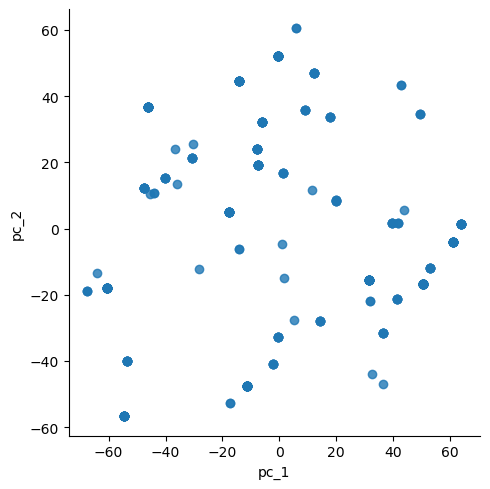

In [286]:
# plt.scatter(transformed_team_pokemon_matrix[:, 0], transformed_team_pokemon_matrix[:, 1], c="team_id")
# plt.show()

sns.lmplot(data=complete_transformed_team_pokemon_matrix, x="pc_1", y="pc_2", fit_reg=False)